# Clase 03 - Integración numérica

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

### 1. Regla trapezoidal

La integral en el intervalo $[a,b]$ puede ser aproximada por la regla trapezoidal $$ I = [f(a)+f(b)]\frac{H}{2}$$ con $ H = b-a$.

Si la aplicamos a $k > 1$ paneles se tiene $$
I_{k}=\frac{1}{2} I_{k-1}+\frac{H}{2^{k-1}} \sum_{i=1}^{2^{k-2}} f\left[a+\frac{(2 i-1) H}{2^{k-1}}\right]
$$

Usémosla para calcular la integral $$ I = \int_{0}^{\pi} \sqrt{x}\cos x dx$$

In [3]:
def f(x): 
    return  (np.sqrt(x)*np.cos(x))

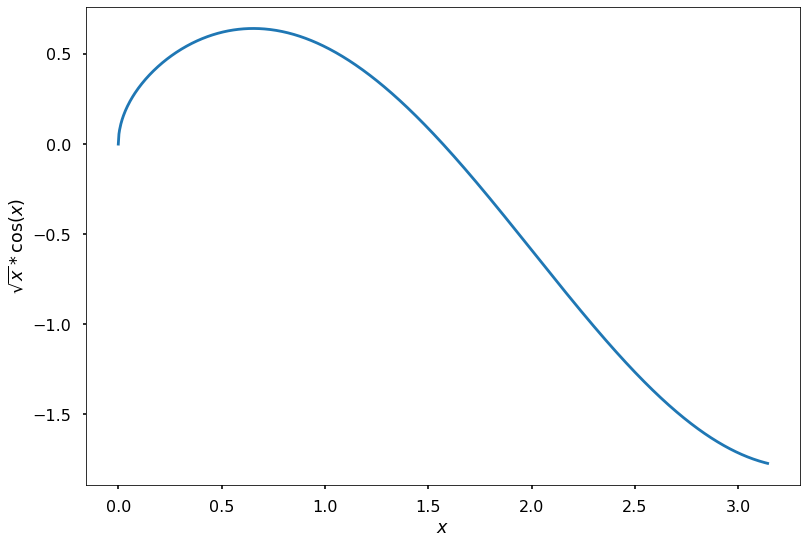

In [4]:
x = np.linspace(0,np.pi,1000)
plt.plot(x,f(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$\sqrt{x}*\cos(x)$');

In [5]:
def trapezoidal(f,a,b,Iold,k):
    if k == 1:
        Inew = (f(a) + f(b))*(b - a)/2.0
    else:
        n = 2**(k - 2)
        h = (b - a)/n
        x = a + h/2.0
        suma = 0.0
        for i in range(n):
            suma = suma + f(x)
            x = x + h
        Inew = (Iold + h*suma)/2.0
    return (Inew)

In [6]:
Iold = 0.0
eps = 1.0e-6
for k in range(1,21):
    Inew = trapezoidal(f,0.0,np.pi,Iold,k)
    print (Inew,k)
    if( k > 1 and np.abs(Inew - Iold) < eps): 
        break 
    Iold = Inew
print("Valor integral =",Inew)
print("Número de paneles =",2**(k-1))

-2.7841639984158535 1
-1.3920819992079265 2
-1.056338333343367 3
-0.9498046747146611 4
-0.9138409458774788 5
-0.9014541939325875 6
-0.8971491275741271 7
-0.8956449881556929 8
-0.8951176226136253 9
-0.8949322730499081 10
-0.89486701725454 11
-0.894844014604286 12
-0.8948358991255596 13
-0.8948330341669359 14
-0.8948320223250747 15
-0.8948316648532865 16
Valor integral = -0.8948316648532865
Número de paneles = 32768


Usando el cambio de variable $t=\sqrt{x}$ se tiene que la integral es $$ I = \int_{0}^{\sqrt{\pi}}2t^2\cos t^2 dt$$

In [7]:
def f1(t):
    return (2*t*t*np.cos(t*t))

In [8]:
Iold = 0.0
eps = 1.0e-6
for k in range(1,21):
    Inew = trapezoidal(f1,0.0,np.sqrt(np.pi),Iold,k)
    print (Inew,k)
    if( k > 1 and np.abs(Inew - Iold) < eps): 
        break 
    Iold = Inew
print("Valor integral =",Inew)
print("Número de paneles =",2**(k-1))

-5.568327996831706 1
-1.7998133768082019 2
-1.0347694378475427 3
-0.925213840456881 4
-0.9021663615273681 5
-0.8966493268558076 6
-0.8952849488950175 7
-0.8949447778827214 8
-0.8948597927445398 9
-0.8948385500593015 10
-0.8948332396129471 11
-0.8948319120154655 12
-0.8948315801170068 13
Valor integral = -0.8948315801170068
Número de paneles = 4096
